In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

## Car Evaluation Dataset

In [3]:
data = 'car_evaluation.csv'

df = pd.read_csv(data, header=None)

In [4]:
# view dimensions of dataset

df.shape

(1728, 7)

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())   

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [8]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [9]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [10]:
X = df.drop(['class'], axis=1)

y = df['class']

In [11]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [12]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [13]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [14]:
#Encode categorical variables
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [16]:
# import category encoders

import category_encoders as ce

In [17]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [18]:
X_train.head()


,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [19]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [20]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [21]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [22]:
y_pred_gini = clf_gini.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8021


In [24]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [25]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7865


In [28]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


[Text(0.4, 0.875, 'X[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.6, 0.625, 'X[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.4, 0.375, 'X[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(0.2, 0.125, 'gini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'gini = 0.654\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

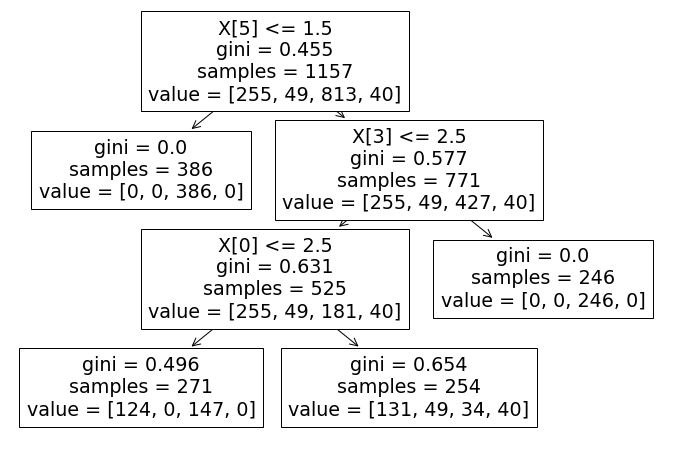

In [29]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [33]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [34]:
y_pred_en = clf_en.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8021


In [36]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [37]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7865


In [38]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


[Text(0.4, 0.875, 'X[5] <= 1.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.6, 0.625, 'X[3] <= 2.5\nentropy = 1.474\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.4, 0.375, 'X[0] <= 2.5\nentropy = 1.638\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(0.2, 0.125, 'entropy = 0.995\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'entropy = 1.759\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

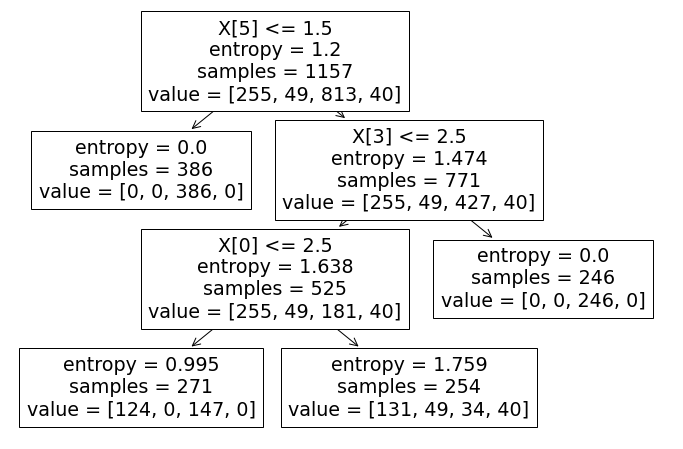

In [39]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [40]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



C:\Users\hassa\miniconda3\envs\general\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hassa\miniconda3\envs\general\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hassa\miniconda3\envs\general\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conculsion

* In this project, I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.8021.

* In the model with criterion gini index, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

* Similarly, in the model with criterion entropy, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.

* In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
The confusion matrix and classification report yields very good model performance.

The work done in this project is inspired from following books and websites:-

Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido

https://en.wikipedia.org/wiki/Decision_tree

https://en.wikipedia.org/wiki/Information_gain_in_decision_trees

https://en.wikipedia.org/wiki/Entropy_(information_theory)

https://www.datacamp.com/community/tutorials/decision-tree-classification-python

https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

https://acadgild.com/blog/decision-tree-python-code

## Iris Dataset

In [94]:
df_iris = pd.read_csv("Iris.csv")

In [95]:
# Removing the unnecessary column
df_iris.drop('Id',axis=1,inplace=True)

df_iris_X = df_iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df_iris_y = df_iris.Species

tree_clf = DecisionTreeClassifier(max_depth=2, random_state = 36)
tree_clf.fit(df_iris_X, df_iris_y)

DecisionTreeClassifier(max_depth=2, random_state=36)

[Text(0.4, 0.8333333333333334, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = Iris-setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Iris-setosa'),
 Text(0.6, 0.5, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = Iris-versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = Iris-versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = Iris-virginica')]

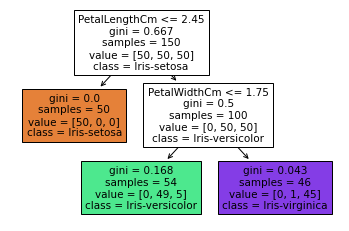

In [98]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

labels = df_iris_X.columns

tree.plot_tree(tree_clf ,feature_names = labels, class_names = df_iris_y.unique(), max_depth = 2, filled = True)


In [99]:
tree_clf.predict_proba([[1,1, 5, 1.5]])

C:\Users\hassa\miniconda3\envs\general\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.        , 0.90740741, 0.09259259]])

In [100]:
tree_clf.predict([[1,1, 5, 1.5]])

C:\Users\hassa\miniconda3\envs\general\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

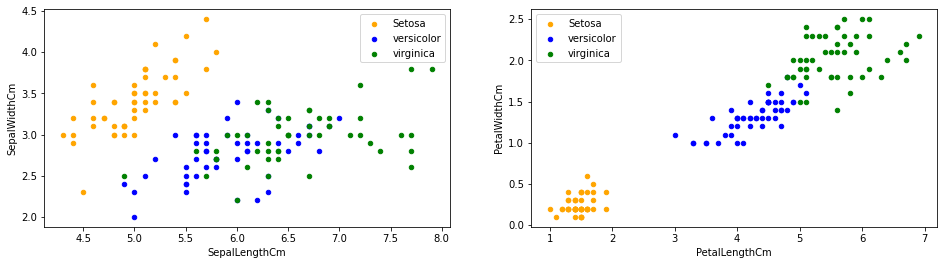

In [101]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,4)

df_iris[df_iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa', ax = ax1)
df_iris[df_iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=ax1)
df_iris[df_iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=ax1)

df_iris[df_iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa', ax = ax2)
df_iris[df_iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=ax2)
df_iris[df_iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=ax2)

plt.show()

In [102]:


melb_data = pd.read_csv("melb_data.csv")

melb_data_X = melb_data[['Rooms','Bathroom','Landsize','Lattitude','Longtitude']]
melb_data_y = melb_data['Price']

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(melb_data_X, melb_data_y)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'Rooms <= 3.5\nsquared_error = 408688105130.517\nsamples = 13580\nvalue = 1075684.079'),
 Text(0.25, 0.5, 'Rooms <= 2.5\nsquared_error = 231134162070.694\nsamples = 10210\nvalue = 925696.453'),
 Text(0.125, 0.16666666666666666, 'squared_error = 130234405166.585\nsamples = 4329\nvalue = 721397.697'),
 Text(0.375, 0.16666666666666666, 'squared_error = 252067704372.97\nsamples = 5881\nvalue = 1076080.625'),
 Text(0.75, 0.5, 'Lattitude <= -37.748\nsquared_error = 671970512226.142\nsamples = 3370\nvalue = 1530097.63'),
 Text(0.625, 0.16666666666666666, 'squared_error = 691313778232.513\nsamples = 2616\nvalue = 1712805.784'),
 Text(0.875, 0.16666666666666666, 'squared_error = 87203658320.831\nsamples = 754\nvalue = 896192.418')]

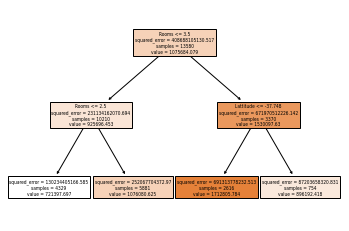

In [103]:
# Visualize the trained Decision Tree by export_graphviz() method

labels = melb_data_X.columns

tree.plot_tree(tree_reg ,feature_names = labels, max_depth = 2, filled = True)

In [104]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')

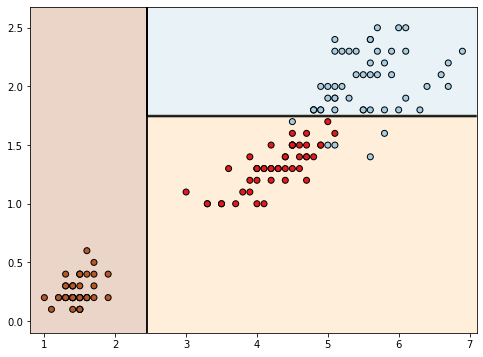

In [105]:
# Load the dataset
df_iris = pd.read_csv("Iris.csv")

# The reason for using two-dimensional numerical data is that we want to show the examples visually.
df_iris_X = df_iris[['PetalLengthCm','PetalWidthCm']]
df_iris_y = df_iris.Species

# convert dataframe to numpy array
df_iris_X = df_iris_X.to_numpy()
df_iris_y = df_iris_y.astype('category').cat.codes

# Fit on classifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(df_iris_X, df_iris_y)

plot_decision_boundary(tree_clf, df_iris_X, df_iris_y)


## Antenna Single Strength Prediction

In [85]:
#reading dataset
new_data = pd.read_csv('comm_antenna.csv')

In [86]:
new_data.head()

,TestFreq,PatchLength,PatchWidth,SlotLength,SlotWidth,Strength
0,1.500000,33.0,33,0.0,0,-4.927274
1,1.551724,33.0,33,0.0,0,-5.077877
2,1.603448,33.0,33,0.0,0,-5.183708
3,1.655172,33.0,33,0.0,0,-5.215997
4,1.706897,33.0,33,0.0,0,-5.120009


In [88]:
#Checking Number of unique values does our columns have 
new_data.nunique()

TestFreq        279
PatchLength       5
PatchWidth        5
SlotLength        6
SlotWidth         6
Strength       1266
dtype: int64

In [90]:
X = new_data.drop(['Strength'], axis=1)
y = new_data['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [93]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = [DecisionTreeRegressor]
for model in models:
    reg = model()
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
    err = mean_squared_error(y_test, pred) ** .5
    print(f'RMSE of {model.__name__} model is: {err}')
    print(f'R2 value of {model.__name__} is: {np.mean(r2_score(y_test, pred))}')
    print('*'*50)

RMSE of DecisionTreeRegressor model is: 1.1852413888330076
R2 value of DecisionTreeRegressor is: 0.8656271457534983
**************************************************
